In [11]:

# Compute total data (DL+UL) per user
user_agg['Total Data (Bytes)'] = user_agg['Total DL (Bytes)'] + user_agg['Total UL (Bytes)']

# Segment users into deciles based on total duration
user_agg['Duration Decile'] = pd.qcut(user_agg['Dur. (ms)'], 10, labels=False) + 1

# Compute total data per decile class
total_data_per_decile = user_agg.groupby('Duration Decile')['Total Data (Bytes)'].sum()
print("\nTotal Data per Duration Decile:")
print(total_data_per_decile)




Total Data per Duration Decile:
Duration Decile
1     1.637365e+13
2     1.831676e+13
3     1.965918e+13
4     1.853975e+13
5     1.520620e+13
6     1.936168e+13
7     1.852437e+13
8     2.353130e+13
9     2.798924e+13
10    4.474496e+13
Name: Total Data (Bytes), dtype: float64


In [12]:
# Basic metrics analysis
# Compute basic metrics
basic_metrics = user_agg[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']].agg(['mean', 'median', 'std'])
print("\nBasic Metrics:")
print(basic_metrics)



Basic Metrics:
            Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
mean    437782.257500      1.900003e+09      1.718445e+08        2.071848e+09
median  307345.500000      1.710036e+09      1.403398e+08        1.852795e+09
std     559021.103012      1.393059e+09      1.069209e+08        1.472529e+09


In [13]:
# Non graphical univariate analysis
# Compute dispersion parameters
dispersion_params = user_agg[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']].agg(['var', 'std'])
print("\nDispersion Parameters:")
print(dispersion_params)



Dispersion Parameters:
        Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
var  3.125046e+11      1.940613e+18      1.143207e+16        2.168342e+18
std  5.590211e+05      1.393059e+09      1.069209e+08        1.472529e+09


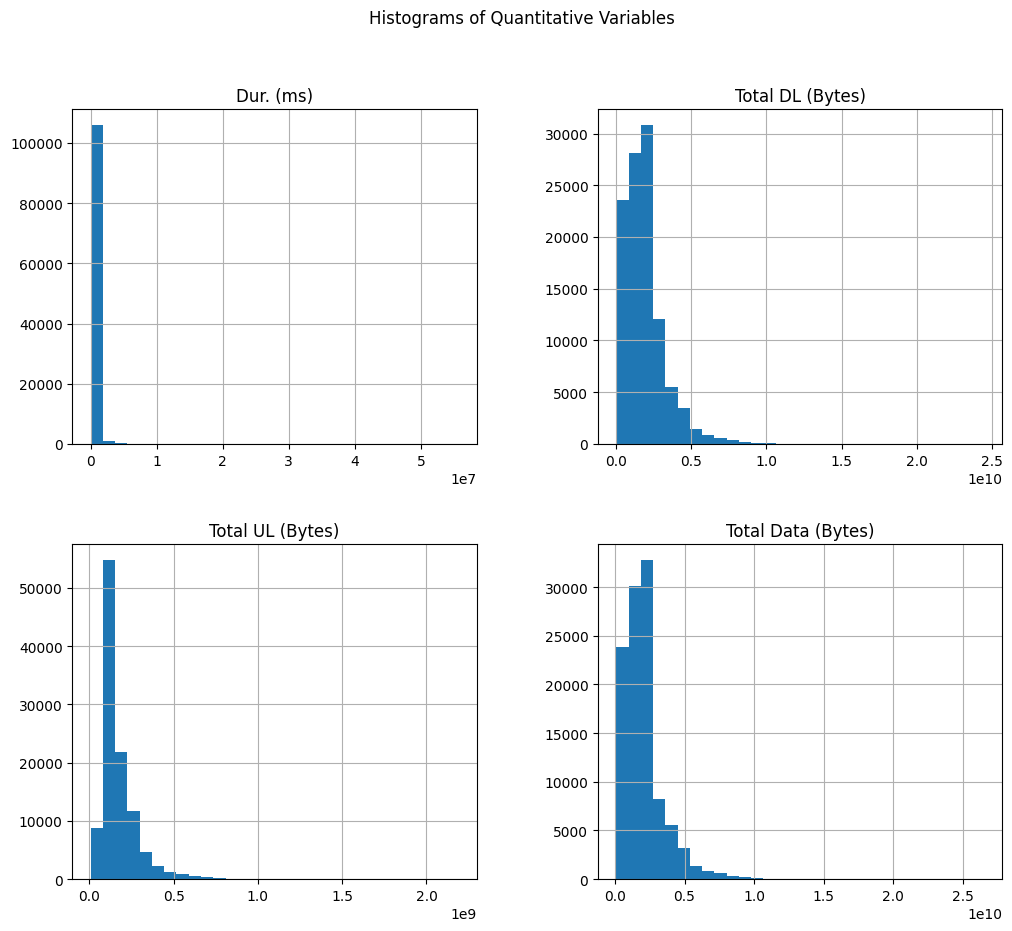

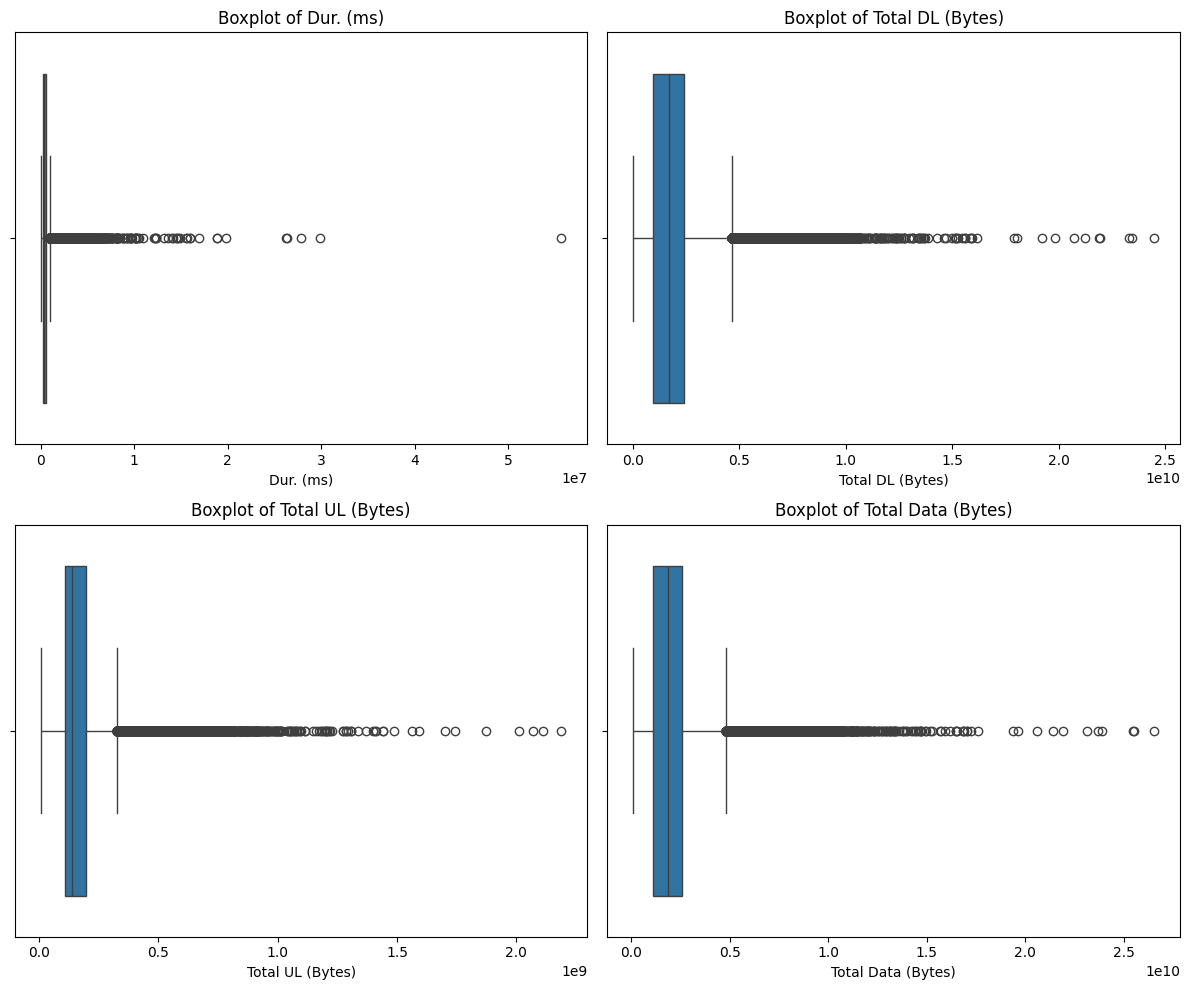

In [14]:
# graphical univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
user_agg[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Quantitative Variables')
plt.show()

# Plot boxplots
plt.figure(figsize=(12, 10))
for i, col in enumerate(['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=user_agg[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


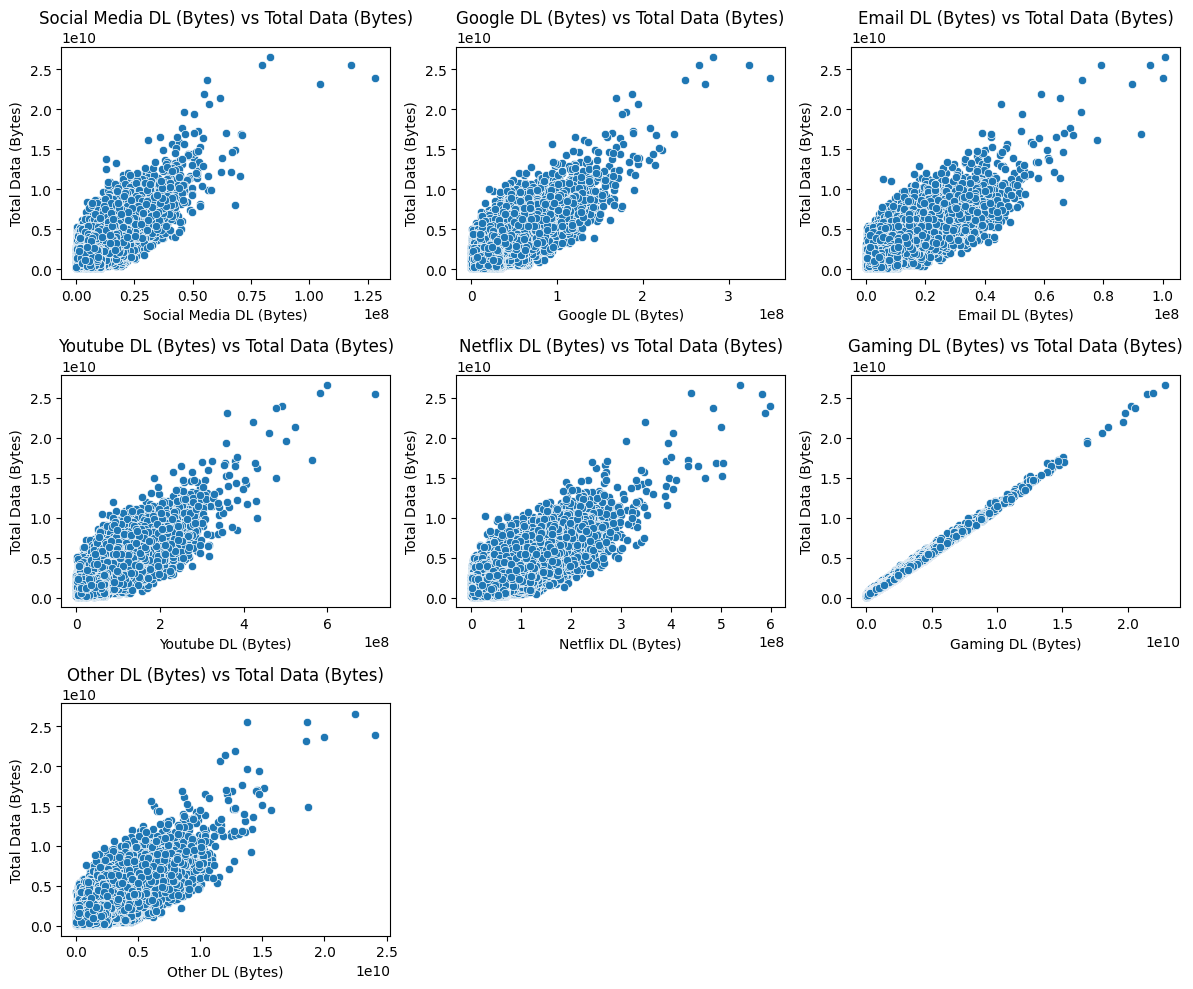

In [15]:
#bivariate analysis
# Scatter plots for relationships
plt.figure(figsize=(12, 10))
for i, col in enumerate(['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=user_agg[col], y=user_agg['Total Data (Bytes)'])
    plt.title(f'{col} vs Total Data (Bytes)')
plt.tight_layout()
plt.show()



Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.585159   
Google DL (Bytes)                       0.585159           1.000000   
Email DL (Bytes)                        0.585486           0.586750   
Youtube DL (Bytes)                      0.582790           0.586092   
Netflix DL (Bytes)                      0.583630           0.584886   
Gaming DL (Bytes)                       0.580875           0.583345   
Other DL (Bytes)                        0.582820           0.584437   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.585486            0.582790   
Google DL (Bytes)                0.586750            0.586092   
Email DL (Bytes)                 1.000000            0.585803   
Youtube DL (Bytes)               0.585803            1.000000   
Netflix DL (Bytes)               0.583339            0.585442   
Gaming DL (Bytes)   

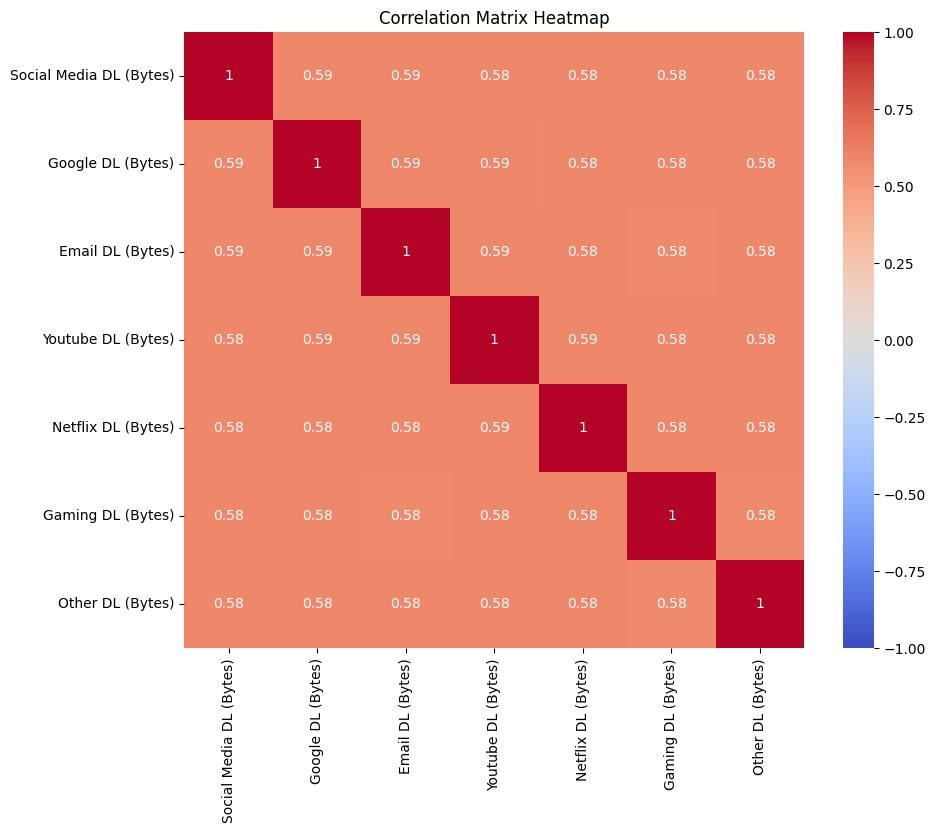

In [16]:
# Correlation analysis
# Compute correlation matrix
correlation_matrix = user_agg[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()



Explained Variance Ratios:
PC1: 0.66
PC2: 0.08


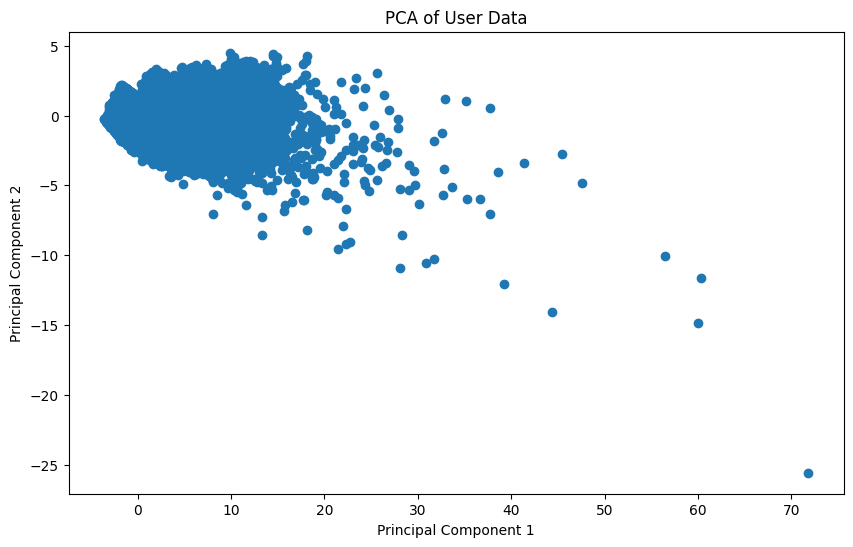

In [17]:
#PCA analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
features = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)', 
            'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
x = user_agg[features].dropna()  # Drop rows with NaN values

# Standardize features
x_standardized = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(x_standardized)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance Ratios:")
print(f"PC1: {explained_variance[0]:.2f}")
print(f"PC2: {explained_variance[1]:.2f}")

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of User Data')
plt.show()
